In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 1. Загрузка и чтение данных:

In [2]:
#url = "https://drive.google.com/file/d/1BgxhB1OftMMoK6Tu5JtlP2qmbtuVHSV6/view?usp=sharing"
url = "https://disk.yandex.ru/d/FE9qSFXlWk8bxw"
data_raw = pd.read_csv('CreditScoreData.csv', sep=',',  engine='python')

Эти данные содержат информацию, относящуюся к кредитной модели лица, которая формирует кредитный рейтинг в качестве критерия для принятия новых кредитных заявок. Эти данные можно использовать для создания машинного обучения, которое может классифицировать кредитный рейтинг человека на основе доступной информации.

Целью анализа кредитного риска является прогнозирование значения в столбце Credit_Score на основе других доступных данных. Таким образом, столбец Credit_Score упоминается как переменная класса. Остальные столбцы входныe переменныe.

Размер таблицы:

In [3]:
data_raw.shape

(23929, 28)

In [4]:
df_obj = data_raw.select_dtypes(['object'])
data_raw[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
data_raw[df_obj.columns] = df_obj.apply(lambda x: x.str.replace(',', ''))
data_raw['Monthly_Inhand_Salary'] = data_raw['Monthly_Inhand_Salary'].astype('float64')
data_raw['Total_EMI_per_month'] = data_raw['Total_EMI_per_month'].astype('float64')
data_raw['Outstanding_Debt'] = data_raw['Outstanding_Debt'].astype('float64')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         23929 non-null  object 
 1   Customer_ID                23929 non-null  object 
 2   Month                      23929 non-null  object 
 3   Name                       23929 non-null  object 
 4   Age                        23929 non-null  int64  
 5   SSN                        23929 non-null  object 
 6   Occupation                 23929 non-null  object 
 7   Annual_Income              23929 non-null  object 
 8   Monthly_Inhand_Salary      23929 non-null  float64
 9   Num_Bank_Accounts          23929 non-null  int64  
 10  Num_Credit_Card            23929 non-null  int64  
 11  Interest_Rate              23929 non-null  int64  
 12  Num_of_Loan                23929 non-null  int64  
 13  Type_of_Loan               21403 non-null  obj

In [5]:
data_raw.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34848,3038.0,2,...,Good,605.03,38.55,320,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
1,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34848,3038.0,2,...,Good,605.03,34.98,323,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good
2,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34848,3038.0,2,...,Good,605.03,33.38,324,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good
3,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34848,3038.0,2,...,Good,605.03,32.93,326,No,18.82,218.90,Low_spent_Small_value_payments,356.08,Good
4,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30690,2612.0,2,...,Good,632.46,26.54,207,No,16.42,81.23,Low_spent_Large_value_payments,433.60,Standard


In [6]:
data_raw.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
23924,0x25faf,CUS_0x2084,June,Ryanl,21,253-72-7758,Architect,38321,3107.0,4,...,Good,678.57,37.37,208,No,362.07,26.70,High_spent_Large_value_payments,434.47,Standard
23925,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,37188,3097.0,1,...,Good,620.64,39.08,357,No,84.21,223.88,Low_spent_Small_value_payments,291.62,Good
23926,0x25fcf,CUS_0xaf61,February,Chris Wickhamm,49,133-16-7738,Writer,37188,3097.0,1,...,Good,620.64,32.80,358,No,84.21,70.87,High_spent_Large_value_payments,394.62,Good
23927,0x25fd1,CUS_0xaf61,April,Chris Wickhamm,49,133-16-7738,Writer,37188,3097.0,1,...,Good,620.64,36.98,360,No,84.21,215.49,Low_spent_Small_value_payments,300.01,Good
23928,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20003,1930.0,10,...,Bad,3571.70,37.14,75,Yes,60.96,34.66,High_spent_Large_value_payments,337.36,Standard


Признаки представляют собой:

1. Interest_Rate : представляет процентную ставку по кредитной карте.

2. Credit_Mix : представляет классификацию сочетания кредитов.

3. Outstanding_Debt: представляет оставшуюся задолженность, подлежащую оплате (в долларах США).

4. Credit_History_Age_Months: представляет возраст кредитной истории человека (месяц).

5. Total_EMI_per_month : представляет ежемесячные платежи EMI (в долларах США).

6. Num_Credit_Card : представляет количество других кредитных карт, принадлежащих человеку.

7. Num_Bank_Accounts : представляет количество банковских счетов, которыми владеет человек.

8. Monthly_Inhand_Salary : представляет месячную базовую зарплату человека.

9. Changed_Credit_Limit : представляет процентное изменение лимита кредитной карты.

10. Occupation : представляет род занятия человека

11. Credit_Score : представляет кредитный рейтинг


In [7]:
data_raw.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age_Months',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Удалим все, что не вошло в список признаков:

In [8]:
col_del = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
          'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
          'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',]
data_raw.drop(columns = col_del, inplace=True, axis=1)
data_raw.columns

Index(['Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age_Months',
       'Total_EMI_per_month', 'Credit_Score'],
      dtype='object')

Задача состоит в прогнозировании номинального признака Credit_Score

Заменим у номинальных признаков тип на специальный, предназначенный для хранения категориальных значений:

In [9]:
data_raw['Credit_Mix'] = data_raw['Credit_Mix'].astype('category')
data_raw['Occupation'] = data_raw['Occupation'].astype('category')

В итоге получаем:

In [10]:
data_raw['Credit_Mix'].dtype

CategoricalDtype(categories=['Bad', 'Good', 'Standard'], ordered=False)

In [11]:
data_raw['Occupation'].dtype

CategoricalDtype(categories=['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
                  'Entrepreneur', 'Journalist', 'Lawyer', 'Manager',
                  'Mechanic', 'Media_Manager', 'Musician', 'Scientist',
                  'Teacher', 'Writer'],
                 ordered=False)

In [12]:
data_raw.Credit_Score[data_raw.Credit_Score == 'Poor'] = 0
data_raw.Credit_Score[data_raw.Credit_Score == 'Standard'] = 1
data_raw.Credit_Score[data_raw.Credit_Score == 'Good'] = 2
data_raw['Credit_Score'] = data_raw['Credit_Score'].astype('int64')

c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

# Визуализация и основные характеристики

# Информация о количественных признаках:

In [13]:
data_raw.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age_Months,Total_EMI_per_month,Credit_Score
count,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000
mean,4058.284425,5.647541,5.611058,15.038196,10.724694,1474.496219,217.536880,1405.129713,0.862385
std,3094.752576,2.361770,2.051159,8.766724,6.846783,1179.950043,99.635405,8267.951089,0.662048
min,304.000000,1.000000,1.000000,1.000000,-6.440000,0.340000,2.000000,0.000000,0.000000
25%,1599.000000,4.000000,4.000000,8.000000,5.680000,589.670000,140.000000,30.890000,0.000000
50%,3004.000000,6.000000,6.000000,14.000000,9.690000,1203.170000,216.000000,68.570000,1.000000
75%,5804.000000,8.000000,7.000000,20.000000,15.340000,2061.500000,298.000000,156.530000,1.000000
max,15205.000000,10.000000,10.000000,76.000000,36.290000,4998.070000,404.000000,82204.000000,2.000000


Информация состоит из:

Count - Количество значений для каждого признака

Mean - Средние значения

STD - Стандартные отклонения (На сколько в среднем отклоняются варианты от среднего значения)

Min/Max - Минимальные/Максимальные значения

25% - Пертвый квартиль (Значения, которые объект не превышает с вероятностью 25%)

50% - Квартиль 50% (Медиана)

75% - Третий квартиль (Значения, которые объект не превышает с вероятностью 75%)

max - Максимальное значение столбца

Рассмотрим признаки подробнее:

1) Changed_Credit_Limit (процентное изменение лимита кредитной карты)

Среднее значение параметра равно 10.7%, а его медиана составляет 9.7%

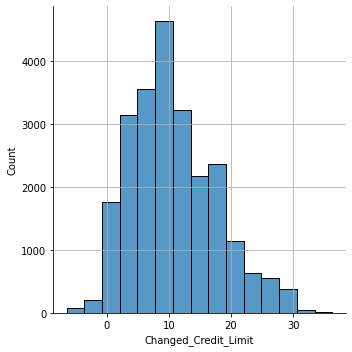

In [14]:
sns.displot(data_raw['Changed_Credit_Limit'], bins=15)
plt.grid()
pass

2) Credit_History_Age_Months (возраст кредитной истории человека)

Среднее значение параметра равно 217.5 месяцев, а его медиана составляет 216

Пик достигается примерно от 200 до 250 месяцев, а остальные показатели почти равномерно распределены по другим

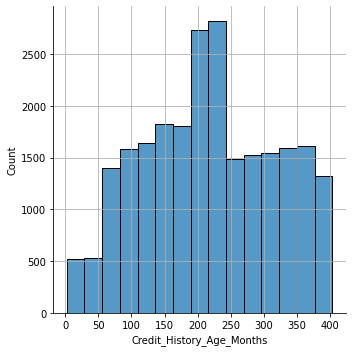

In [15]:
sns.displot(data_raw['Credit_History_Age_Months'], bins=15)
plt.grid()
pass

3) Interest_Rate (Процентная ставка по кредитной карте)

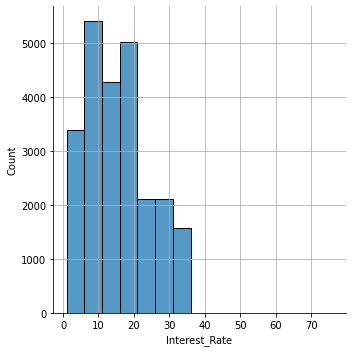

In [16]:
sns.displot(data_raw['Interest_Rate'], bins=15)
plt.grid()
pass

4) Num_Bank_Accounts ( Количество банковских счетов, которыми владеет человек)

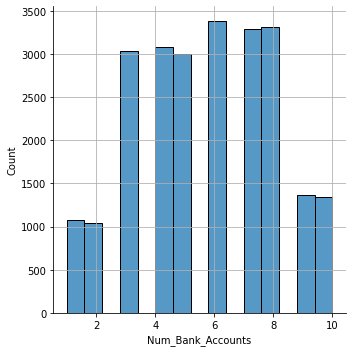

In [17]:
sns.displot(data_raw['Num_Bank_Accounts'], bins=15)
plt.grid()
pass

5) Num_Credit_Card (Количество других кредитных карт, принадлежащих человеку)

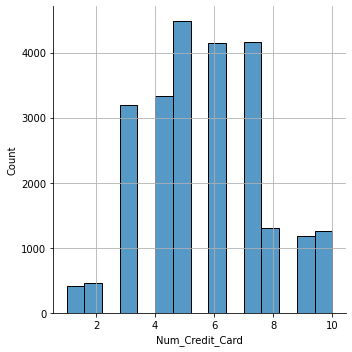

In [18]:
sns.displot(data_raw['Num_Credit_Card'], bins=15)
plt.grid()
pass

Вычислим матрицу корреляции для количественных признаков (чтобы выявить связи между признаками):

In [19]:
corr_matrix = data_raw.corr()
corr_matrix

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age_Months,Total_EMI_per_month,Credit_Score
Monthly_Inhand_Salary,1.000000,-0.266516,-0.218701,-0.296088,-0.165308,-0.274858,0.280430,0.006210,0.198036
Num_Bank_Accounts,-0.266516,1.000000,0.431957,0.555569,0.306525,0.508560,-0.466475,0.004081,-0.373140
Num_Credit_Card,-0.218701,0.431957,1.000000,0.483217,0.246554,0.490967,-0.412879,-0.002972,-0.385764
Interest_Rate,-0.296088,0.555569,0.483217,1.000000,0.349698,0.621792,-0.569267,0.009237,-0.479041
Changed_Credit_Limit,-0.165308,0.306525,0.246554,0.349698,1.000000,0.462423,-0.416873,-0.002468,-0.150630
Outstanding_Debt,-0.274858,0.508560,0.490967,0.621792,0.462423,1.000000,-0.631680,-0.001611,-0.376584
Credit_History_Age_Months,0.280430,-0.466475,-0.412879,-0.569267,-0.416873,-0.631680,1.000000,0.000602,0.379407
Total_EMI_per_month,0.006210,0.004081,-0.002972,0.009237,-0.002468,-0.001611,0.000602,1.000000,0.004662
Credit_Score,0.198036,-0.373140,-0.385764,-0.479041,-0.150630,-0.376584,0.379407,0.004662,1.000000


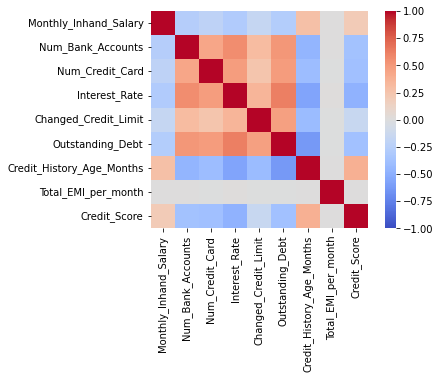

In [20]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', vmin=-1, vmax=1)
pass

Благодаря визуальному образу корреляционной матрицы можно заметить, что у признаков наблюдатся связи.

# Информация о номинальных (категориальных) признаках:

In [21]:
data_raw.describe(include=['category'])

,Occupation,Credit_Mix
count,23929,23929
unique,15,3
top,Lawyer,Standard
freq,1687,11646


Информация состоит из:

1. Count - Количество значений

2. Unique - Количество уникальных значений

3. Top - Наиболее встречающееся значение

4. Freq - Частота наиболее встречающегося значения

In [22]:
data_raw['Credit_Mix'].value_counts()

Standard    11646
Good         6266
Bad          6017
Name: Credit_Mix, dtype: int64

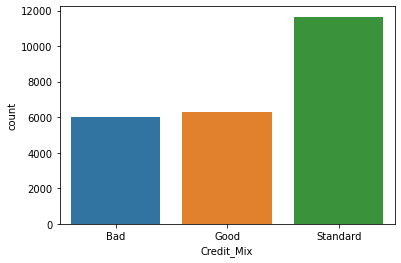

In [23]:
sns.countplot(x='Credit_Mix', data=data_raw)
pass

Стандартное сочетание выше остальных значений в два раза. Стоит заметить, что остальные показатели на одном уровне

In [24]:
data_raw['Occupation'].value_counts()

Lawyer           1687
Accountant       1652
Mechanic         1648
Teacher          1642
Engineer         1631
Architect        1614
Media_Manager    1598
Scientist        1590
Developer        1589
Doctor           1582
Musician         1575
Journalist       1567
Entrepreneur     1552
Manager          1508
Writer           1494
Name: Occupation, dtype: int64

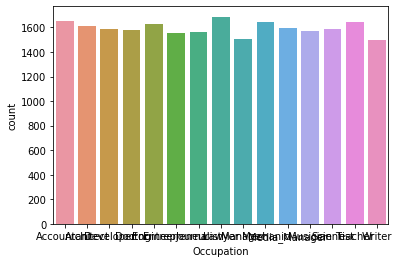

In [25]:
sns.countplot(x='Occupation', data=data_raw)
pass

Взглянем на всевозможные диаграммы рассеивания для каждой пары числовых признаков (возьмем случайные 10%)

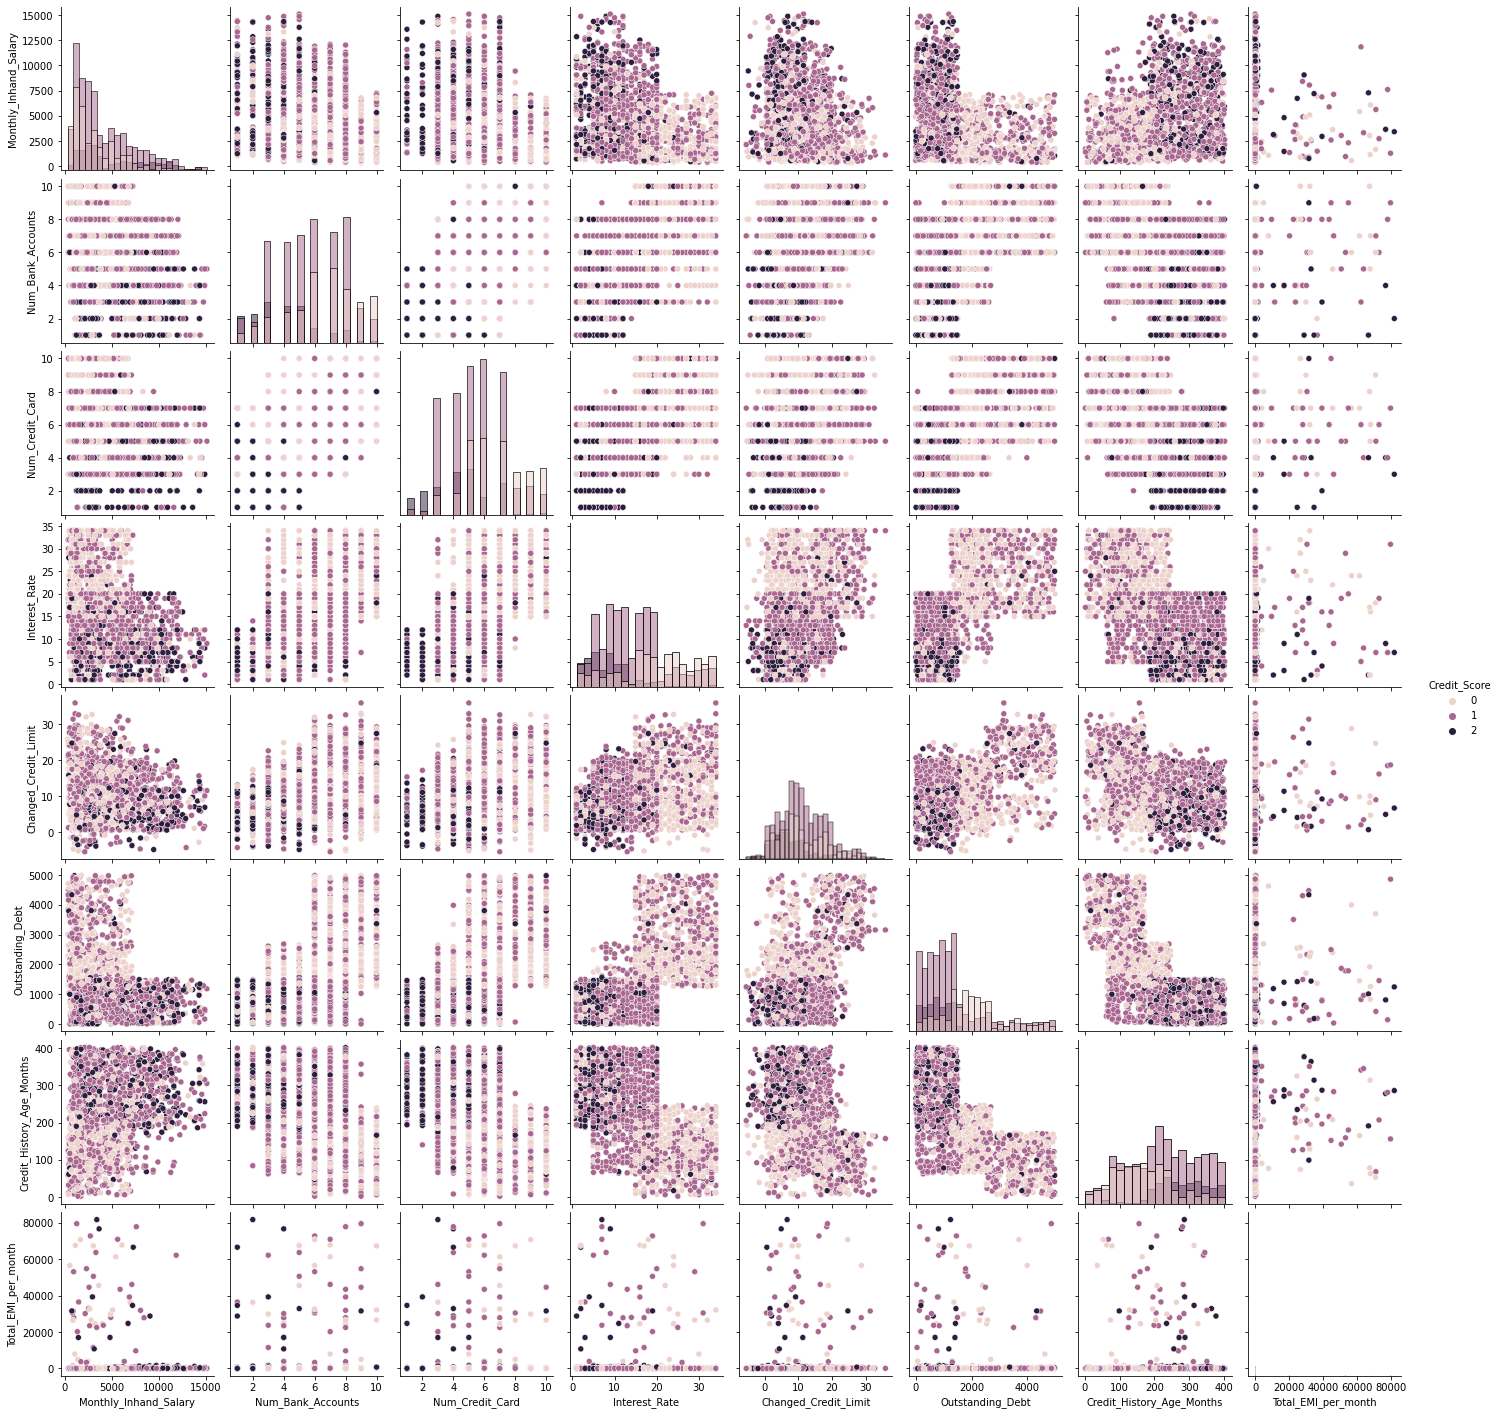

In [26]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=int(0.1 * data_raw.shape[0]), replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='Credit_Score', diag_kind='hist')

Рассмотрим поподробнее:

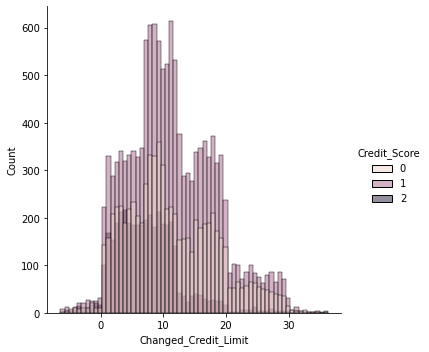

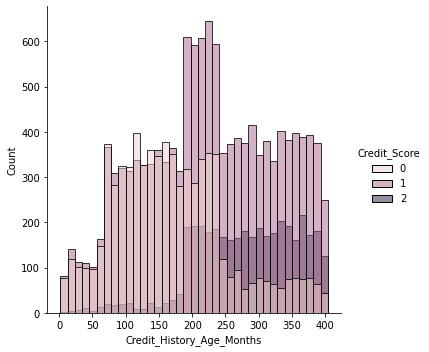

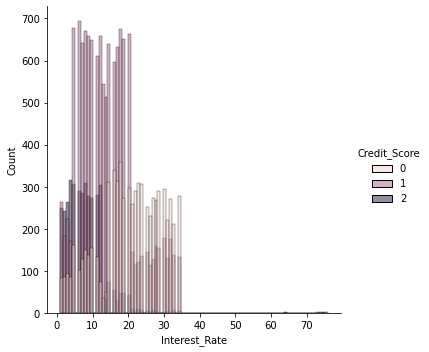

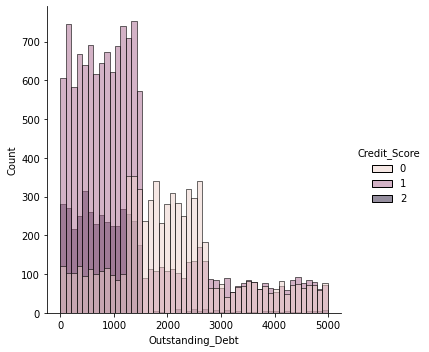

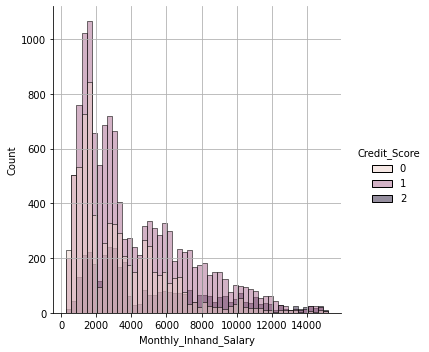

In [27]:
features = ['Changed_Credit_Limit', 'Credit_History_Age_Months', 'Interest_Rate', 'Outstanding_Debt', 'Monthly_Inhand_Salary']

for i, feature in enumerate(features):
    sns.displot(data=data_raw, x=feature, kind='hist', hue='Credit_Score')
    
plt.grid()

На графиках видно, что у бедных слоев самое высокое повышение процентной ставки и самое низкий срок кредитной истории по сравнении с обычным слоем и богатым

# 3. Обработка пропущенных значений

Обработка не нужна, поскольку отсутствуют пропуски в наборе данных:

In [28]:
data_raw.isnull().sum()

Occupation                   0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Changed_Credit_Limit         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_History_Age_Months    0
Total_EMI_per_month          0
Credit_Score                 0
dtype: int64

# 4. Обработка категориальных признаков

Закодируем категориальные признаки с помощью числовых признаков, применив метод бинаризации

In [29]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(23929, 27)


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age_Months,Total_EMI_per_month,Credit_Score,Occupation_Accountant,...,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,3038.0,2,4,6,7.42,605.03,320,18.82,2,0,...,0,0,0,0,0,1,0,0,1,0
1,3038.0,2,4,6,6.42,605.03,323,18.82,2,0,...,0,0,0,0,0,1,0,0,1,0
2,3038.0,2,4,6,5.42,605.03,324,18.82,2,0,...,0,0,0,0,0,1,0,0,1,0
3,3038.0,2,4,6,5.42,605.03,326,18.82,2,0,...,0,0,0,0,0,1,0,0,1,0
4,2612.0,2,5,4,1.99,632.46,207,16.42,1,0,...,0,0,0,0,0,0,0,0,1,0


# 5. Нормализация количественных признаков

Проведем нормализацию количественных признаков с помощью линейного преобразования к заданному отрезку [0,1]

In [30]:
data_numerical = data_raw[['Changed_Credit_Limit', 'Credit_History_Age_Months', 'Interest_Rate', 'Outstanding_Debt', 'Num_Bank_Accounts', 
                           'Num_Credit_Card', 'Monthly_Inhand_Salary', 'Total_EMI_per_month']]
data_numerical = (data_numerical - data_numerical.min(axis=0)) / (data_numerical.max(axis=0) - data_numerical.min(axis=0))
data_numerical.describe()

,Changed_Credit_Limit,Credit_History_Age_Months,Interest_Rate,Outstanding_Debt,Num_Bank_Accounts,Num_Credit_Card,Monthly_Inhand_Salary,Total_EMI_per_month
count,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000,23929.000000
mean,0.401701,0.536161,0.187176,0.294965,0.516393,0.512340,0.251948,0.017093
std,0.160234,0.247849,0.116890,0.236097,0.262419,0.227907,0.207688,0.100578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283641,0.343284,0.093333,0.117920,0.333333,0.333333,0.086907,0.000376
50%,0.377487,0.532338,0.173333,0.240675,0.555556,0.555556,0.181196,0.000834
75%,0.509712,0.736318,0.253333,0.412419,0.777778,0.666667,0.369103,0.001904
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Деление данных на обучающую и тестовую выборки

In [31]:
X = data_raw.drop (['Credit_Score'], axis=1)
y = data_raw['Credit_Score']
data_raw.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Credit_History_Age_Months', 'Total_EMI_per_month', 'Credit_Score',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard'],
      dtype='object')

Разобьем данные на обучающую (75%) и тестовую (25%) выборки:

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(17946, 5983)

# 7. Обучение модели (KNN)

Попробуем сначала классификатор с количеством соседей по умолчанию (5):

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 75.05%, Test: 62.08%. 


Теперь найдем оптимальный параметр для метода ближайших соседей:

In [34]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.3074796210208587 1


In [35]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

knn_training_predict = 100 * knn.score(X_train, y_train)
knn_test_predict = 100 * knn.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 100.00%, Test: 71.20%. 


# 8. Среднеквадратическая ошибка

Вычислим среднеквадратическую ошибку для алгоритма с оптимальным количеством ближайших соседей:

In [36]:
knn_train_predict = knn.score(X_train, y_train)
knn_test_predict = knn.score(X_test, y_test)

MSE_train = np.mean((knn_train_predict - y_train)**2)
MSE_test  = np.mean((knn_test_predict - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 0.46, Test: 0.45. 


# 10. Общие выводы

В данной работе был представлен анализ данных о предсказании, какой кредитный статут получит человек в зависимости от его показателей (кредитная история, процентная ставка, профессия и т.п.), а также решена задача классификации (присваивается кредитный статус) с помощью моделей, натренированный методом: К-ближайших соседей.

В ходе тренировки модели были выполнены следующие действия:

1) Вычислены основные характеристики

2) Проверены данные на пропуски

3) Отфильтрованы категориальные признаки и проведена бинаризация

4) Нормализация количественных признаков

5) Данные разбиты на обучающую и тестовую выборку

6) Обучение модели 

Таким образом, перед тем, как тренировать модель, нужно проанализировать данные и их подготовить, а именно: вычислить основные статистические характеристики и проанализировать их; проверить на пропущенные значения и обработать такие ситуации; подготовить категориальные признаки - провести бинаризацию номинальных признаков; провести нормализацию количественных признаков; разбить данные на обучающую и тестовую выборку; выбрать алгоритм классификации и проверить качество полученной модели.

# 11. Обучение полносвязной нейронной сети

### Однослойная сеть

1) Подбор количества нейронов

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing

layerSize = np.linspace(1, 50, 50)
layerSize = layerSize.astype(int)
test_err, train_err = [], []

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

X_test_minmax = min_max_scaler.transform(X_test)

for size in tqdm(layerSize):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='lbfgs', activation='logistic', max_iter=10000, random_state=42)
    model.fit(X_train_minmax, y_train)

    y_train_pred = model.predict(X_train_minmax)
    y_test_pred = model.predict(X_test_minmax)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [1:16:31<00:00, 91.84s/it]


Min error. Train : 0.22, Test: 0.29. 


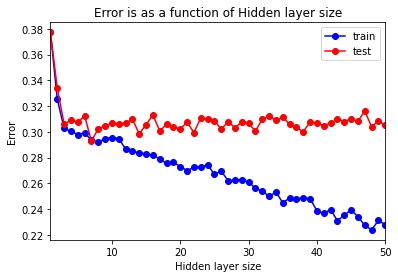

In [38]:
plt.plot(layerSize, train_err, 'b-o', label = 'train')
plt.plot(layerSize, test_err, 'r-o', label = 'test')
plt.xlim([np.min(layerSize), np.max(layerSize)])
plt.title('Error is as a function of Hidden layer size')
plt.xlabel('Hidden layer size')
plt.ylabel('Error')
plt.legend()

print("Min error. Train : {:.2f}, Test: {:.2f}. ".format(np.min(train_err), np.min(test_err)))

In [39]:
layer_opt = layerSize[np.argmin(test_err)]
print(layer_opt)

7


2) Подбор alpha

In [40]:
alpha_arr = np.logspace(-3, 2, 21)
alpha_arr = alpha_arr.astype(float)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    model = MLPClassifier(alpha = alpha, hidden_layer_sizes=(layer_opt,), 
                          solver='lbfgs', activation='logistic', max_iter=10000, random_state=42)
    model.fit(X_train_minmax, y_train)

    y_train_pred = model.predict(X_train_minmax)
    y_test_pred = model.predict(X_test_minmax)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

  0%|                                                                                           | 0/21 [00:00<?, ?it/s]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  5%|███▉                                                                               | 1/21 [00:07<02:31,  7.58s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit

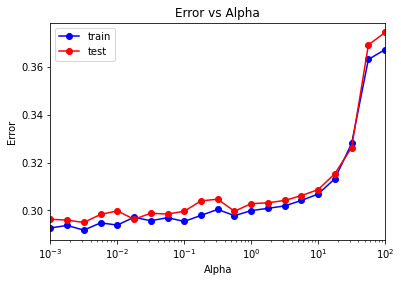

In [41]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

Изменение метрики в зависимости от гиперпараметра:

Min error. Train : 0.29, Test: 0.30. 


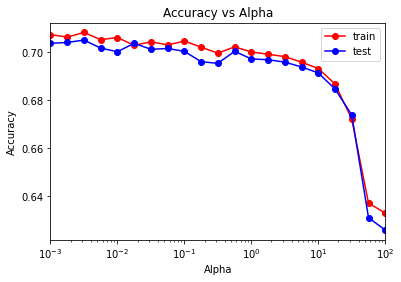

In [42]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()

print("Min error. Train : {:.2f}, Test: {:.2f}. ".format(np.min(train_err), np.min(test_err)))

In [43]:
alpha_opt = alpha_arr[np.argmin(test_err)]

Повторное обучение:

0.29181990415691517
0.2950025071034598


c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


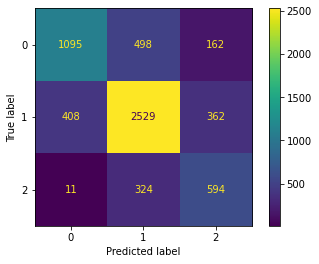

In [44]:
model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (layer_opt,),
                          solver = 'lbfgs', activation = 'logistic', max_iter=10000, random_state = 42)
model.fit(X_train_minmax, y_train)

y_train_pred = model.predict(X_train_minmax)
y_test_pred = model.predict(X_test_minmax)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_minmax, y_test)

### Двуслойная сеть

1) Подбор количества нейронов

In [45]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))

for i, sl1 in tqdm(enumerate(sizes)):
    for j, sl2 in tqdm(enumerate(sizes)):
        model = MLPClassifier(hidden_layer_sizes=(sl1, sl2, ), 
                              solver='lbfgs', activation='logistic', max_iter=10000, random_state=42)
        model.fit(X_train_minmax, y_train)

        y_train_pred = model.predict(X_train_minmax)
        y_test_pred = model.predict(X_test_minmax)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  7.70it/s]
2it [00:00,  6.69it/s]
3it [00:03,  1.68s/it]
4it [00:10,  3.53s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

5it [00:24,  7.56s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("

6it [02:02, 23.37s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

7it [02:36, 27.08s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

8it [03:14, 30.52s/it]c:\users\oleg\appdata\local\programs\python\python37

4it [01:27, 23.40s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

5it [01:56, 25.49s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

6it [02:30, 28.09s/it]c:\users\oleg\appdata\local\programs\python\python37

3it [01:18, 27.67s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

4it [01:54, 30.84s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

5it [02:33, 33.75s/it]c:\users\oleg\appdata\local\programs\python\python37

2it [00:38, 22.03s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

3it [01:16, 29.29s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

4it [01:58, 34.42s/it]c:\users\oleg\appdata\local\programs\python\python37

10it [08:27, 50.73s/it]
10it [56:07, 336.73s/it]


Min error. Train : 0.23, Test: 0.29. 


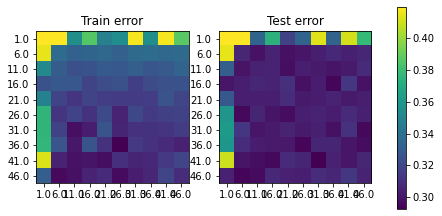

In [46]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Min error. Train : {:.2f}, Test: {:.2f}. ".format(np.min(train_err), np.min(test_err)))

In [47]:
hls1 = np.argmin(test_err, axis=1)[0]
hls2 = np.argmin(test_err, axis=1)[1]

2) Подбор alpha

In [48]:
alpha_arr = np.logspace(-3, 2, 21)
alpha_arr = alpha_arr.astype(float)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    model = MLPClassifier(alpha = alpha, hidden_layer_sizes=(hls1, hls2, ), 
                          solver='lbfgs', activation='logistic', max_iter=10000, random_state=42)

    model.fit(X_train_minmax, y_train)

    y_train_pred = model.predict(X_train_minmax)
    y_test_pred = model.predict(X_test_minmax)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

 10%|███████▉                                                                           | 2/21 [00:02<00:28,  1.49s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 29%|███████████████████████▋                                                           | 6/21 [00:27<01:15,  5.02s/it]c:\users\oleg\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit

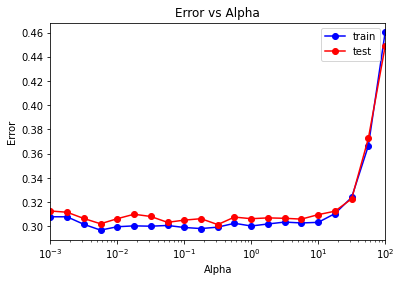

In [49]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

Изменение метрики в зависимости от гиперпараметра:

Min error. Train : 0.30, Test: 0.30. 


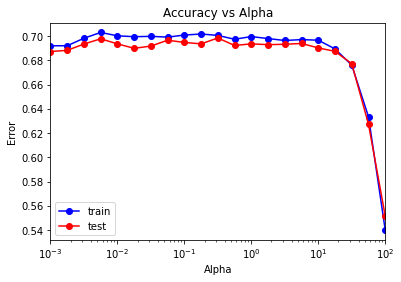

In [50]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

print("Min error. Train : {:.2f}, Test: {:.2f}. ".format(np.min(train_err), np.min(test_err)))

In [51]:
alpha_opt = alpha_arr[np.argmin(test_err)]

Построим матрицу рассогласования:

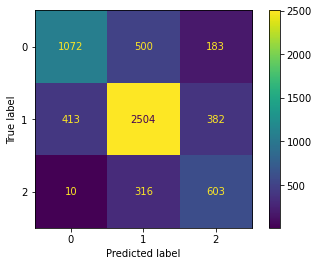

In [52]:
model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes=(hls1, hls2, ), 
                      solver='lbfgs', activation='logistic', max_iter=10000, random_state=42)
model.fit(X_train_minmax, y_train)

y_test_pred = model.predict(X_test_minmax)

plot_confusion_matrix(model, X_test_minmax, y_test)

### Вывод

В этой работе потребовалось подобрать параметры для количества нейронов (каждый скрытный слой) и для alpha, чтобы провести обучение полносвязной нейронной сети (один и два скрытых слоя). В ходе обучения были сделаны следующие выводы касаемо ошибок и переобучения. Во-первых, наименьшая ошибка составляет 22% (тренировочная выборка). Во-вторых, для установления минимальной ошибки были подобраны оптимальные значения. В-третьих, все варианты модели показывают близкие результаты, то есть ошибки на уровне 23%.